In [ ]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Circular_Task_Project"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Hugo (and Copilot)"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Circular_Task_Project

01 December 2025, 19:00:01

by Hugo (and Copilot)

This program is free software : you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

In [22]:
# Set up the environment without pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 

# 1/ Load the data
FILE = "data/001MoDe_R1.csv"
# Load full dataset
full_data = np.genfromtxt(FILE, delimiter=';', skip_header=3, names=True)
# Keep only the useful columns
blank = full_data[['timestamp', 'mouseX', 'mouseY', 'mouseInTarget']]
# Center coordinates reference
CENTER_X = 552
CENTER_Y = 330

timestamp = np.array(blank['timestamp'], dtype=np.int64)

print("The first 5 lines of the dataset:")
print(blank[:5])

print("\n--- 5 first Timestamps ---")
print(timestamp[:5])

# Verification of X and Y coordinates
# Extract the columns as you did for the timestamp
x_vals = np.array(blank['mouseX'])
y_vals = np.array(blank['mouseY'])

print("\n--- 5 first X and Y ---")
# Loop to display them neatly side by side
for i in range(5):
    print(f"Line {i}: X={x_vals[i]}, Y={y_vals[i]}")

# Small safety check (see if there are any NaNs)
if np.isnan(timestamp[0]):
    print("\n⚠️ WARNING: Timestamps are 'nan'. The CSV file format might be problematic (decimal commas?).")
else:
    print("\n✅ The data seems to be loaded correctly.")

The first 5 lines of the dataset:
[(1.61677671e+12, 501., 554., 1.) (1.61677671e+12, 487., 551., 1.)
 (1.61677671e+12, 484., 550., 1.) (1.61677671e+12, 481., 549., 1.)
 (1.61677671e+12, 478., 548., 1.)]

--- 5 first Timestamps ---
[1616776712329 1616776712351 1616776712356 1616776712359 1616776712366]

--- 5 first X and Y ---
Line 0: X=501.0, Y=554.0
Line 1: X=487.0, Y=551.0
Line 2: X=484.0, Y=550.0
Line 3: X=481.0, Y=549.0
Line 4: X=478.0, Y=548.0

✅ The data seems to be loaded correctly.


## My role in this Group Project is to recreate the Circle Graph for all the records

### Let's begin by recreating the 5 records before plotting the final accumulated record (the raw trajectory data). 

Records detected: 5


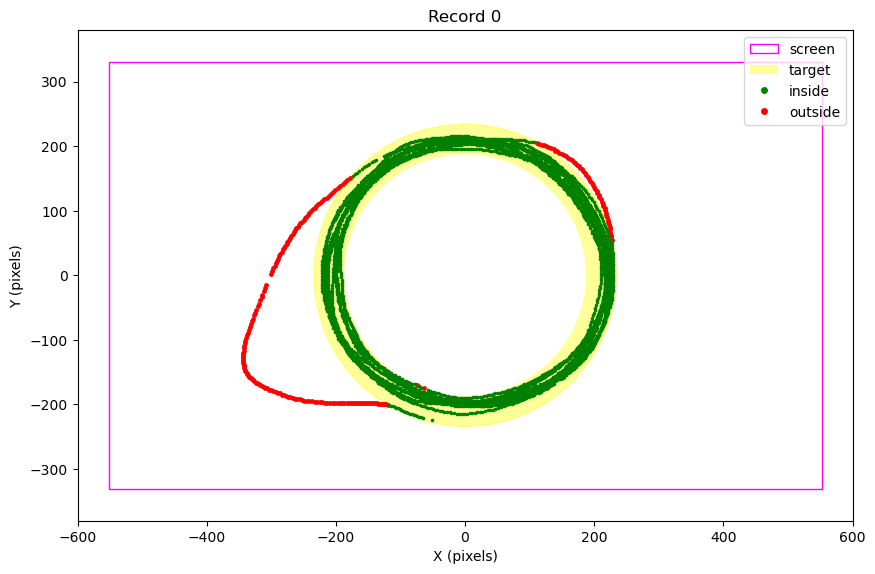

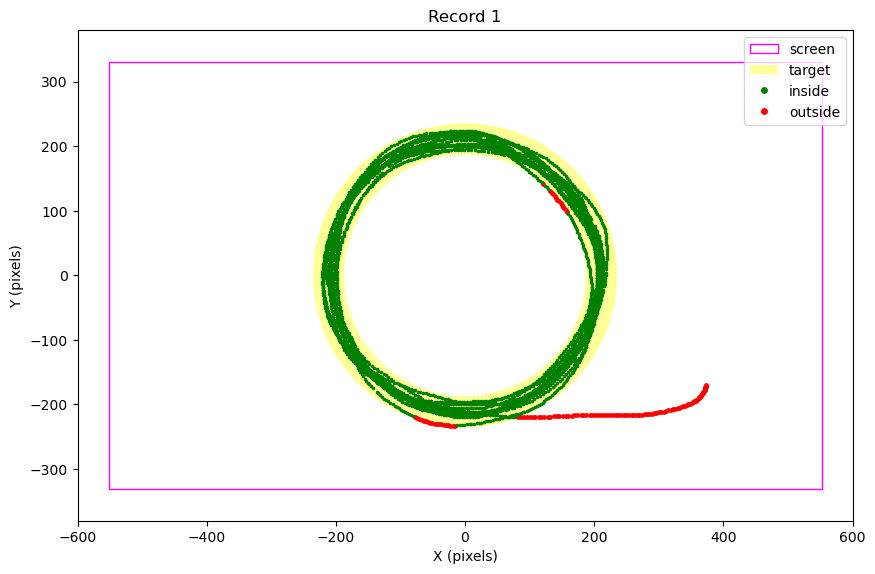

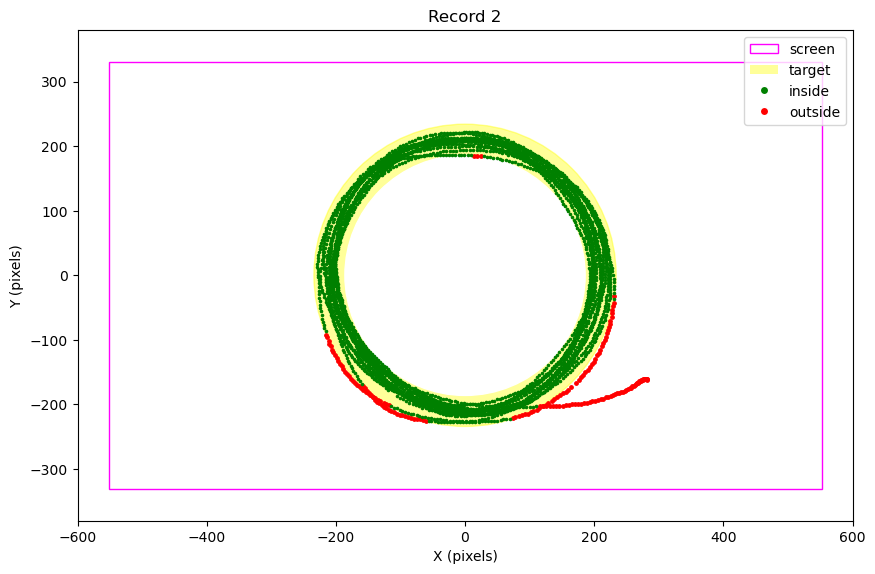

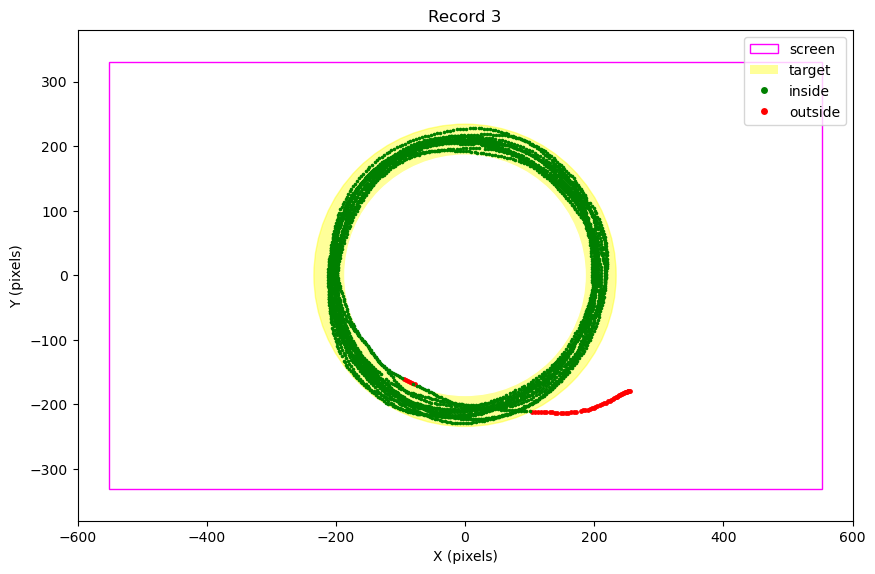

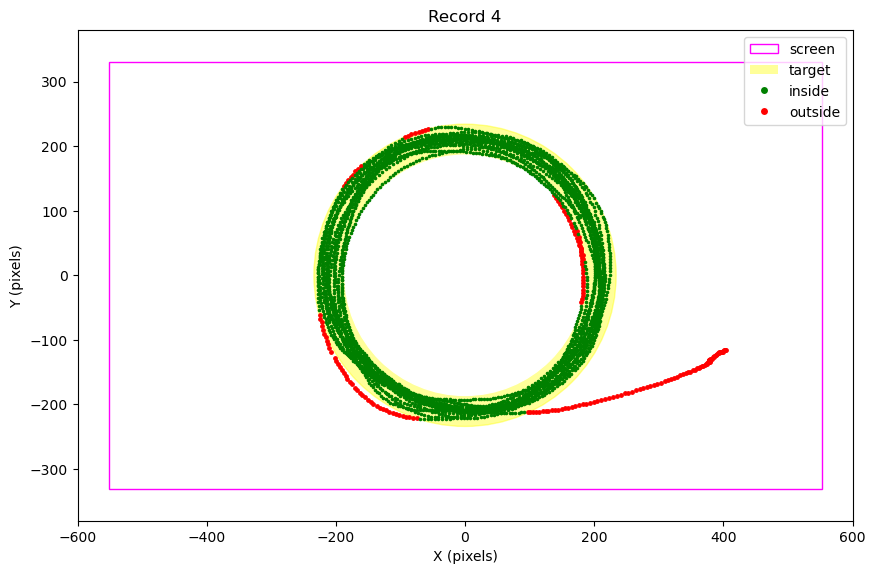

In [ ]:
# Configuration
filename = "data/001MoDe_R1.csv"

# Parse parameters from header
params = {'centerX': 552, 'centerY': 330, 'externalRadius': 250, 'internalRadius': 170, 'screenWidth': 1104, 'screenHeight': 661, 'cursorRadius': 16}
try:
    with open(filename, 'r') as f:
        header = f.readline().strip()
    for part in header.split(';'):
        if ' ' in part:
            k, v = part.strip().split(' ', 1)
            try: params[k] = float(v)
            except: pass
except: pass

# Data reading
raw_data = []
try:
    with open(filename, 'r') as f:
        lines = f.readlines()[3:]
    for line in lines:
        if not line.strip(): continue
        sep = ';' if ';' in line else ','
        vals = line.strip().split(sep)
        try:
            raw_data.append([float(vals[0].replace(',', '.')), float(vals[1].replace(',', '.')), 
                             float(vals[2].replace(',', '.')), float(vals[3].replace(',', '.'))])
        except: continue
except Exception as e: print(f"Error: {e}")

# Automatic Record detection
data = np.array(raw_data)
valid_points = data[(data[:, 1] != 0) | (data[:, 2] != 0)]
jumps = np.where(np.diff(valid_points[:, 0]) > 1000)[0] + 1
boundaries = [0] + list(jumps) + [len(valid_points)]

records = []
for i in range(len(boundaries)-1):
    if boundaries[i+1] - boundaries[i] > 50:
        records.append(valid_points[boundaries[i]:boundaries[i+1]])

print(f"Records detected: {len(records)}")

# Plotting Loop
cx, cy = params['centerX'], params['centerY']
sw, sh = params['screenWidth'], params['screenHeight']
r_ext = params['externalRadius'] - params['cursorRadius']
r_int = params['internalRadius'] + params['cursorRadius']

for i, rec in enumerate(records):
    # Data prep
    x = rec[:, 1] - cx
    y = -(rec[:, 2] - cy)
    target = rec[:, 3]
    
    # Setup Figure
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Draw Screen & Target
    ax.add_patch(patches.Rectangle((-sw/2, -sh/2), sw, sh, fill=False, edgecolor='#FF00FF', linewidth=1, zorder=1))
    ax.add_patch(plt.Circle((0,0), r_ext, color='yellow', alpha=0.4, zorder=0))
    ax.add_patch(plt.Circle((0,0), r_int, color='white', zorder=0))
    
    # Draw Points (Red/Green)
    mask_ok = (target == 1)
    if np.any(~mask_ok): ax.scatter(x[~mask_ok], y[~mask_ok], c='red', s=6, zorder=2)
    if np.any(mask_ok): ax.scatter(x[mask_ok], y[mask_ok], c='green', s=2.5, zorder=3)
    
    # Formatting
    ax.set_xlim(-600, 600)
    ax.set_ylim(-380, 380)
    ax.set_yticks(np.arange(-300, 301, 100))
    ax.set_aspect('equal')
    ax.set_title(f"Record {i}")
    ax.set_xlabel("X (pixels)")
    ax.set_ylabel("Y (pixels)")
    
    # Legend
    legend = [patches.Patch(facecolor='none', edgecolor='#FF00FF', label='screen'),
              patches.Patch(facecolor='yellow', alpha=0.4, label='target'),
              Line2D([0], [0], marker='o', color='w', markerfacecolor='green', label='inside'),
              Line2D([0], [0], marker='o', color='w', markerfacecolor='red', label='outside')]
    ax.legend(handles=legend, loc='upper right')
    
    plt.show()

### Make the final graph record - the Raw Trajectory data

--- Global Analysis: data/001MoDe_R1.csv ---


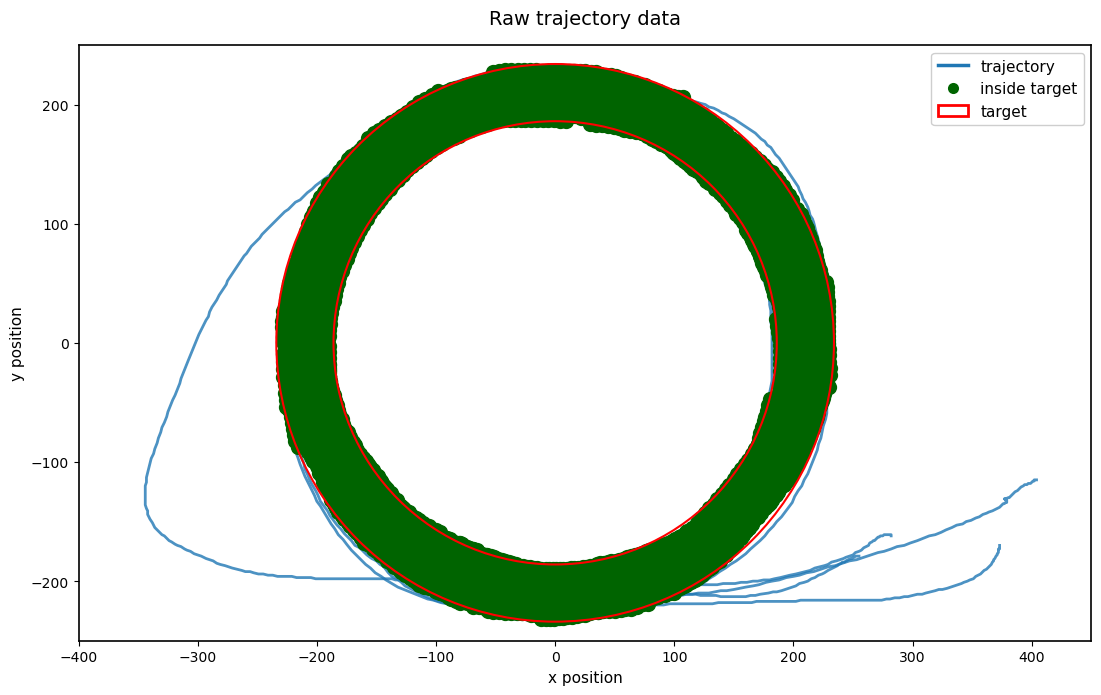

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# =============================================================================
# 1. CONFIGURATION
# =============================================================================
filename = "data/001MoDe_R1.csv"

# =============================================================================
# 2. LOADING AND PROCESSING
# =============================================================================
print(f"--- Global Analysis: {filename} ---")

params = {
    'centerX': 552, 'centerY': 330, 
    'externalRadius': 250, 'internalRadius': 170, 'cursorRadius': 16,
    'screenWidth': 1104, 'screenHeight': 661
}
try:
    with open(filename, 'r') as f:
        header = f.readline().strip()
    for part in header.split(';'):
        if ' ' in part:
            k, v = part.strip().split(' ', 1)
            try: params[k] = float(v)
            except: pass
except: pass

raw_data = []
try:
    with open(filename, 'r') as f:
        lines = f.readlines()[3:]
    for line in lines:
        if not line.strip(): continue
        sep = ';' if ';' in line else ','
        vals = line.strip().split(sep)
        try:
            t = float(vals[0].replace(',', '.'))
            x = float(vals[1].replace(',', '.'))
            y = float(vals[2].replace(',', '.'))
            it = float(vals[3].replace(',', '.'))
            raw_data.append([t, x, y, it])
        except: continue
except: pass

data = np.array(raw_data)
# Filter valid points
valid_points = data[(data[:, 1] != 0) | (data[:, 2] != 0)] 
timestamps = valid_points[:, 0]
# Detect records (jumps > 1000ms)
jumps = np.where(np.diff(timestamps) > 1000)[0] + 1
boundaries = [0] + list(jumps) + [len(valid_points)]

records = []
for i in range(len(boundaries)-1):
    start = boundaries[i]
    end = boundaries[i+1]
    if end - start > 50:
        records.append(valid_points[start:end])

# =============================================================================
# 3. PLOTTING
# =============================================================================
x_min, x_max = -400, 450
y_min, y_max = -250, 250

# Calculate dimensions to maintain aspect ratio
x_range = x_max - x_min
y_range = y_max - y_min
aspect_ratio = y_range / x_range

fig, ax = plt.subplots(figsize=(12, 12 * aspect_ratio))

cx, cy = params.get('centerX', 0), params.get('centerY', 0)
r_ext = params.get('externalRadius', 250) - params.get('cursorRadius', 16)
r_int = params.get('internalRadius', 170) + params.get('cursorRadius', 16)

# 1. Target (Red contour only) - NO offset
c_ext = plt.Circle((0, 0), r_ext, color='red', fill=False, linewidth=1.5, zorder=5)
c_int = plt.Circle((0, 0), r_int, color='red', fill=False, linewidth=1.5, zorder=5)
ax.add_patch(c_ext)
ax.add_patch(c_int)

# 2. Trajectories - NO offset
for rec_data in records:
    x = rec_data[:, 1] - cx
    y = -(rec_data[:, 2] - cy)  # Y inversion only
    target = rec_data[:, 3]
    
    # A. Blue Line (Complete trajectory)
    ax.plot(x, y, color='#1f77b4', linewidth=2, alpha=0.8, zorder=2)
    
    # B. Green Points (Inside Target)
    mask_ok = (target == 1)
    if np.any(mask_ok):
        ax.plot(x[mask_ok], y[mask_ok], 'o', color='darkgreen', markersize=11, 
                markeredgewidth=0, zorder=4)

# 3. Custom Legend
legend_elements = [
    Line2D([0], [0], color='#1f77b4', linewidth=2.5, label='trajectory'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='darkgreen', 
           markersize=8, markeredgewidth=0, label='inside target', linestyle=''),
    patches.Patch(facecolor='none', edgecolor='red', linewidth=2, label='target')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.95)

# 4. FORMATTING
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_aspect('equal')

# Plot border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.2)

ax.set_title("Raw trajectory data", fontsize=14, pad=15, fontweight='normal')
ax.set_xlabel("x position", fontsize=11)
ax.set_ylabel("y position", fontsize=11)

# Ticks
ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()